In [1]:
import pandas as pd
import os
import xgboost as xgb
import operator
from matplotlib import pylab as plt
from sklearn import preprocessing

In [2]:
# import data
train = pd.read_csv("./train_sample.csv")
test = pd.read_csv("./test_sample.csv")
# sample = pd.read_csv('../input/sampleSubmission.csv')

# map Class_n to n-1
#class_range = range(1, 10)
#class_dict = {}
#for n in class_range:
#    class_dict['Class_{}'.format(n)] = n-1
#train['target'] = train['target'].map(class_dict)

In [3]:
# drop ids and get labels
labels = train.target.values
labels = preprocessing.LabelEncoder().fit_transform(labels)
train = train.drop(["target"], axis=1)
features=list(train.columns[0:])
test = test.drop("id", axis = 1)

print("Here")

Here


In [5]:
# train a xgboost classifier
params = {"objective": "multi:softprob", "eval_metric":"mlogloss", "num_class": 9}
train_xgb = xgb.DMatrix(train, labels)
test_xgb  = xgb.DMatrix(test)
trainRound = 100

In [6]:
gbm = xgb.train(params, train_xgb, trainRound)
# pred = gbm.predict(test_xgb)

print("Here 2")

Here 2


In [30]:
pred = gbm.predict(test_xgb)

In [31]:
# create a feature map
outfile = open('xgb.fmap', 'w')
i = 0
for feat in features:
    outfile.write('{0}\t{1}\tq\n'.format(i, feat))
    i = i + 1
outfile.close()


<Figure size 432x288 with 0 Axes>

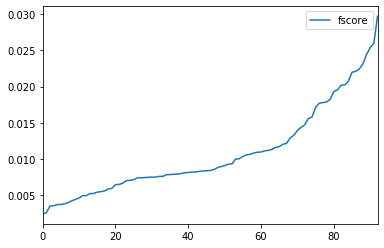

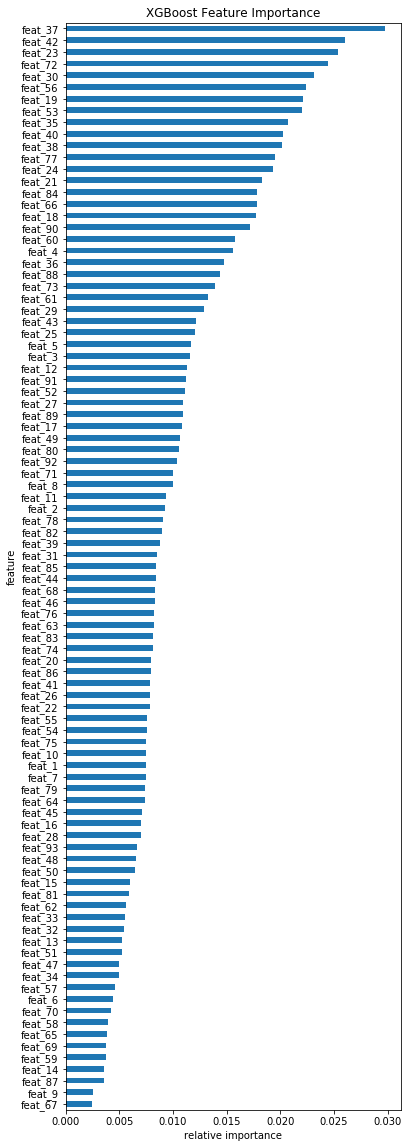

In [32]:
# plot feature importance
importance = gbm.get_fscore(fmap='xgb.fmap')
importance = sorted(importance.items(), key=operator.itemgetter(1))
df = pd.DataFrame(importance, columns=['feature', 'fscore'])
df['fscore'] = df['fscore'] / df['fscore'].sum()
plt.figure()
df.plot()
df.plot(kind='barh', x='feature', y='fscore', legend=False, figsize=(6, 20))
plt.title('XGBoost Feature Importance')
plt.xlabel('relative importance')
plt.gcf().savefig('feature_importance_xgb.png')

In [33]:
test.index

RangeIndex(start=0, stop=19594, step=1)

In [34]:
# create submission file
test_tmp = pd.read_csv("./test_sample.csv")
pred = pd.DataFrame(pred, index=test_tmp.id.values, columns=[f"{i}" for i in range(9)])
pred.index.name = "id"
pred.to_csv('prediction_v1.csv')

In [35]:
pred

0         1         2             3             4         5  \
id                                                                          
1      0.000029  0.981779  0.009648  8.187241e-03  2.765628e-05  0.000073   
2      0.194874  0.019668  0.009119  3.281074e-03  1.065900e-04  0.514532   
3      0.035906  0.016776  0.009390  8.438355e-04  2.420650e-04  0.029543   
4      0.003389  0.000037  0.000097  1.141176e-03  5.050323e-06  0.983059   
5      0.001470  0.058731  0.001799  1.284022e-02  9.043549e-01  0.001340   
...         ...       ...       ...           ...           ...       ...   
19590  0.008990  0.001170  0.000201  7.603141e-05  1.547405e-05  0.904067   
19591  0.021068  0.013995  0.023400  3.924345e-02  7.364068e-04  0.551420   
19592  0.000022  0.000036  0.000005  2.830681e-05  9.998581e-01  0.000006   
19593  0.000001  0.000003  0.000002  1.797091e-07  5.943165e-09  0.000002   
19594  0.008988  0.002397  0.001337  1.152645e-04  2.591899e-04  0.001272   

                  6         7         8  
id                                       
1      1.293345e-04  0.000042  0.000084  
2      4.085001e-02  0.126344  0.091225  
3      4.481739e-03  0.872989  0.029829  
4      2.696128e-03  0.009445  0.000131  
5      1.043083e-03  0.005529  0.012893  
...             ...       ...       ...  
19590  3.288438e-04  0.003342  0.081810  
19591  1.141582e-02  0.011626  0.327094  
19592  6.842818e-06  0.000024  0.000014  
19593  9.521954e-07  0.999989  0.000001  
19594  1.666847e-04  0.010878  0.974586  

[19594 rows x 9 columns]